In [1]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
# import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [2]:
pwd

'C:\\Users\\dell\\Desktop\\brain_tumor'

In [3]:
os.listdir('C:\\Users\\dell\\Desktop\\brain_tumor')

['.ipynb_checkpoints', 'brain_tumor_dataset', 'no', 'Untitled.ipynb', 'yes']

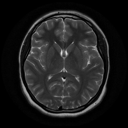

In [4]:
im =Image.open('C:\\Users\\dell\\Desktop\\brain_tumor\\no\\1 no.jpeg').resize((128,128))
im

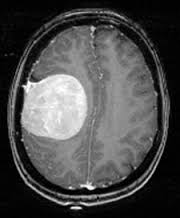

In [5]:
im = Image.open(r'C:\Users\dell\Desktop\brain_tumor\yes\Y1.jpg')
im

In [6]:
yes=os.listdir(r'C:\Users\dell\Desktop\brain_tumor\yes')
no=os.listdir(r'C:\Users\dell\Desktop\brain_tumor\no')

In [7]:
yes

['Y1.jpg',
 'Y10.jpg',
 'Y100.JPG',
 'Y101.jpg',
 'Y102.jpg',
 'Y103.jpg',
 'Y104.jpg',
 'Y105.jpg',
 'Y106.jpg',
 'Y107.jpg',
 'Y108.jpg',
 'Y109.JPG',
 'Y11.jpg',
 'Y111.JPG',
 'Y112.JPG',
 'Y113.JPG',
 'Y114.JPG',
 'Y115.JPG',
 'Y116.JPG',
 'Y117.JPG',
 'Y12.jpg',
 'Y120.JPG',
 'Y13.jpg',
 'Y14.jpg',
 'Y146.JPG',
 'Y147.JPG',
 'Y148.JPG',
 'Y15.jpg',
 'Y153.jpg',
 'Y154.jpg',
 'Y155.JPG',
 'Y156.JPG',
 'Y157.JPG',
 'Y158.JPG',
 'Y159.JPG',
 'Y16.JPG',
 'Y160.JPG',
 'Y161.JPG',
 'Y162.jpg',
 'Y163.JPG',
 'Y164.JPG',
 'Y165.JPG',
 'Y166.JPG',
 'Y167.JPG',
 'Y168.jpg',
 'Y169.jpg',
 'Y17.jpg',
 'Y170.JPG',
 'Y18.JPG',
 'Y180.jpg',
 'Y181.jpg',
 'Y182.JPG',
 'Y183.jpg',
 'Y184.JPG',
 'Y185.jpg',
 'Y186.jpg',
 'Y187.jpg',
 'Y188.jpg',
 'Y19.JPG',
 'Y192.JPG',
 'Y193.JPG',
 'Y194.jpg',
 'Y195.JPG',
 'Y2.jpg',
 'Y20.jpg',
 'Y21.jpg',
 'Y22.jpg',
 'Y23.JPG',
 'Y24.jpg',
 'Y242.JPG',
 'Y243.JPG',
 'Y244.JPG',
 'Y245.jpg',
 'Y246.JPG',
 'Y247.JPG',
 'Y248.JPG',
 'Y249.JPG',
 'Y25.jpg',
 'Y250

In [8]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [9]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [10]:
len(data_target)==len(data)

True

In [11]:
len(data_target)

253

In [12]:
len(data)

253

In [13]:
yes_values=os.listdir(r'C:\Users\dell\Desktop\brain_tumor\yes')
no_values=os.listdir(r'C:\Users\dell\Desktop\brain_tumor\no')

In [14]:
len(yes_values), len(no_values)

(155, 98)

In [15]:
155+98

253

In [16]:
yes_file = "C:\\Users\\dell\\Desktop\\brain_tumor\\yes"
no_file = "C:\\Users\\dell\\Desktop\\brain_tumor\\no"

In [17]:
import glob

In [18]:
X_data =[]
for file in glob.glob(yes_file+'/*.jpg'):
    img = cv2.imread(file)
    face = cv2.resize(img, (32, 32))
#     print(face)
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [19]:
len(X_data)

154

In [20]:
# X_data =[]
for file in glob.glob(no_file+'/*.jpg'):
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread(file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [21]:
len(X_data)

245

In [22]:
y_data =[]
for file in glob.glob(yes_file+'/*.png'):
    img = cv2.imread(file)
    face = cv2.resize(img, (32, 32))
#     print(face)
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    y_data.append(img)

In [23]:
len(y_data)

1

In [24]:
for file in glob.glob(no_file+'/*.png'):
    img = cv2.imread(file)
    face = cv2.resize(img, (32, 32))
#     print(face)
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    y_data.append(img)

In [25]:
len(y_data)

2

In [26]:
for file in glob.glob(no_file+'/*.jpeg'):
    img = cv2.imread(file)
    face = cv2.resize(img, (32, 32))
#     print(face)
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    y_data.append(img)

In [27]:
len(y_data)

8

In [28]:
for i in y_data :
    X_data.append(i)

In [29]:
len(X_data)

253

In [30]:
len(X_data)==len(data)==len(data_target)

True

In [31]:
X = np.squeeze(X_data)

In [32]:
X.shape

(253, 32, 32, 3)

In [33]:
# normalize data
X = X.astype('float32')
X /= 255

In [34]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [36]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [37]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [38]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 2s 320ms/step - loss: 0.6095 - acc: 0.6526 - val_loss: 1.7988 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 159ms/step - loss: 0.5958 - acc: 0.8158 - val_loss: 0.9111 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 160ms/step - loss: 0.4925 - acc: 0.8158 - val_loss: 0.8205 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 153ms/step - loss: 0.5295 - acc: 0.8158 - val_loss: 0.8804 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 147ms/step - loss: 0.4954 - acc: 0.8158 - val_loss: 1.0893 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 160ms/step - loss: 0.4623 - acc: 0.8158 - val_loss: 1.4083 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 178ms/step - loss: 0.4889 - acc: 0.8158 - val_loss: 1.2934 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 228ms/step - loss: 0.1410 - acc: 0.9579 - val_loss: 2.2636 - val_acc: 0.3175
Epoch 63/150
2/2 [==============================] - 0s 177ms/step - loss: 0.1171 - acc: 0.9579 - val_loss: 2.5296 - val_acc: 0.3016
Epoch 64/150
2/2 [==============================] - 1s 228ms/step - loss: 0.1200 - acc: 0.9632 - val_loss: 2.3954 - val_acc: 0.3333
Epoch 65/150
2/2 [==============================] - 0s 232ms/step - loss: 0.1282 - acc: 0.9579 - val_loss: 1.5470 - val_acc: 0.4921
Epoch 66/150
2/2 [==============================] - 0s 160ms/step - loss: 0.1622 - acc: 0.9211 - val_loss: 2.8849 - val_acc: 0.2063
Epoch 67/150
2/2 [==============================] - 0s 206ms/step - loss: 0.1829 - acc: 0.9263 - val_loss: 2.1762 - val_acc: 0.3810
Epoch 68/150
2/2 [==============================] - 0s 195ms/step - loss: 0.1544 - acc: 0.9263 - val_loss: 2.3005 - val_acc: 0.3492
Epoch 69/150
2/2 [==============================] - 0s 152ms/step - loss: 0.1194 - acc: 0

Epoch 124/150
2/2 [==============================] - 1s 230ms/step - loss: 0.0217 - acc: 0.9947 - val_loss: 3.0506 - val_acc: 0.4286
Epoch 125/150
2/2 [==============================] - 1s 234ms/step - loss: 0.0212 - acc: 0.9947 - val_loss: 3.5429 - val_acc: 0.3810
Epoch 126/150
2/2 [==============================] - 0s 196ms/step - loss: 0.0229 - acc: 0.9947 - val_loss: 3.7157 - val_acc: 0.3651
Epoch 127/150
2/2 [==============================] - 0s 173ms/step - loss: 0.0326 - acc: 0.9842 - val_loss: 3.4354 - val_acc: 0.4286
Epoch 128/150
2/2 [==============================] - 0s 184ms/step - loss: 0.0112 - acc: 0.9947 - val_loss: 3.2833 - val_acc: 0.4286
Epoch 129/150
2/2 [==============================] - 0s 203ms/step - loss: 0.0112 - acc: 1.0000 - val_loss: 3.4035 - val_acc: 0.3968
Epoch 130/150
2/2 [==============================] - 0s 179ms/step - loss: 0.0152 - acc: 1.0000 - val_loss: 3.5378 - val_acc: 0.3968
Epoch 131/150
2/2 [==============================] - 0s 193ms/step - 

In [40]:
# import pydot

In [41]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

FileNotFoundError: [WinError 2] "dot" not found in path.

In [42]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4126984179019928


In [43]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 [==============================] - 0s 10ms/step


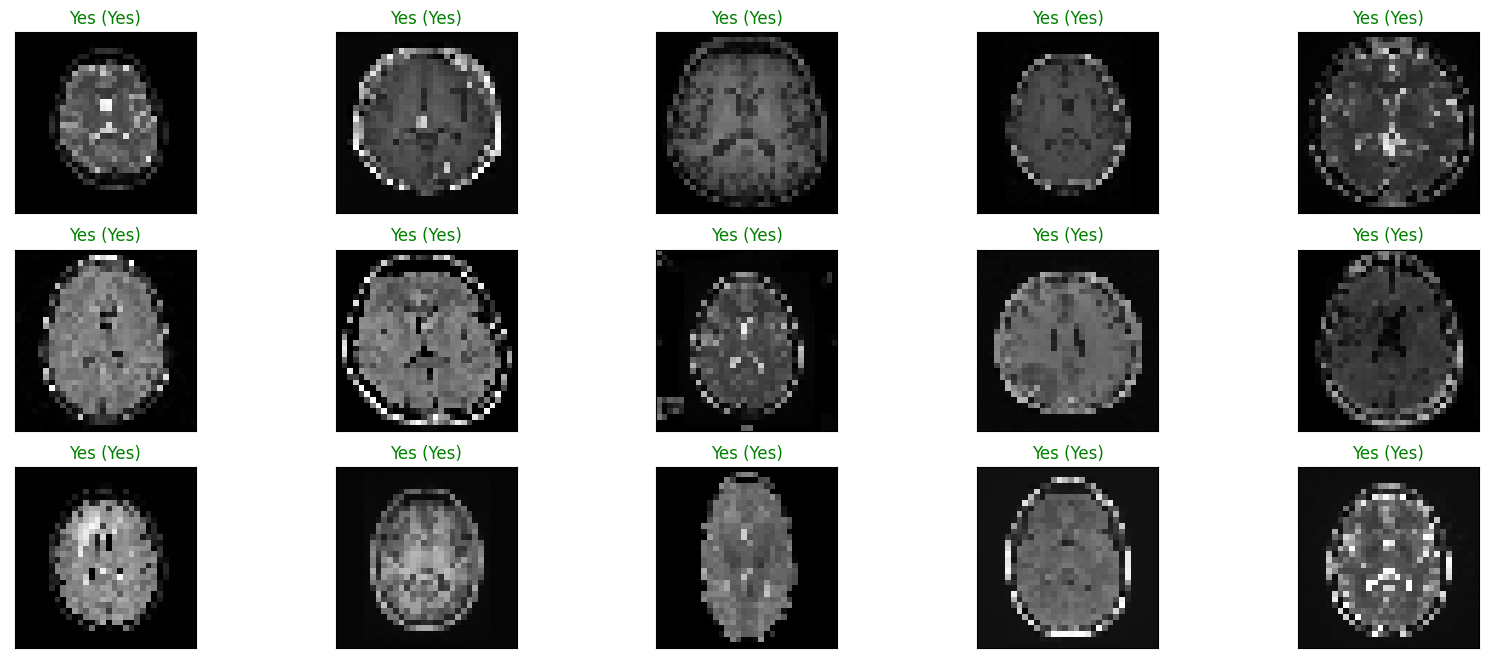

In [44]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()